In [50]:
import numpy as np
import matplotlib.pyplot as plt
import math

# %matplotlib notebook
%matplotlib inline

In [13]:
def Progonka(arr):
    A = [[arr[i][j] for j in range(len(arr[i]))] for i in range(len(arr))]
    n = len(A)

    #   Формирование массивов чисел a, b, c, d _____________
    #   a = [a0, a1, a2, ..., a_n]
    a, b, c, d = [0], [arr[0][0]], [arr[0][1]], [arr[0][2]]
    for i in arr[1:-1]:
        a.append(i[0])
        b.append(i[1])
        c.append(i[2])
        d.append(i[3])

    a.append(arr[-1][0])
    b.append(arr[-1][1])
    c.append(0)
    d.append(arr[-1][2])

    for i in range(n):
        if math.fabs(b[i]) < math.fabs(a[i]) + math.fabs(c[i]):
            raise Exception

    #   Формирование массивов P, Q (Расчет значений) ((Прямой ход))

    P, Q = [-c[0] / b[0]], [d[0] / b[0]]

    for i in range(1, n):
        P.append(-c[i] / (b[i] + a[i] * P[i - 1]))
        Q.append((d[i] - a[i] * Q[i - 1]) / (b[i] + a[i] * P[i - 1]))

    #   Вычисление решения системы (Обратный ход)
    x = [Q[n - 1]]
    for i in range(1, n):
        x.append(P[n - 1 - i] * x[i - 1] + Q[n - 1 - i])

#     print('P:')
#     print(np.array(P))
#     print('Q:')
#     print(np.array(Q))

    x = reversed(x)
    return x

Задаем параметр а

In [48]:
a = 0.01

In [23]:
N = 100
T_end = 3
X_end = math.pi
X = np.linspace(0, X_end, N)
T = np.linspace(0, T_end, N)
u = U(X, T)

h = X_end / N
tau = T_end / N
sigma = a*a*tau/h/h
sigma

0.003039635509270133

In [24]:
U = lambda x, t: np.exp(-a*t)*np.cos(x)

phi_0 = lambda t: math.exp(-a*t)
phi_l = lambda t: -math.exp(-a*t)
xi = lambda x: math.cos(x)

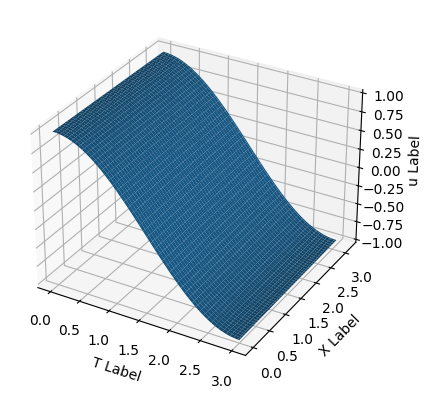

In [25]:
u2 = np.array([[U(i, j) for j in T] for i in X])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Q, W = np.meshgrid(X, T)
ax.plot_surface(W, Q, np.array(u2))

ax.set_xlabel('T Label')
ax.set_ylabel('X Label')
ax.set_zlabel('u Label')
None

# Явная конечноразностная схема

Средкв ошибка: 9.42271971308962


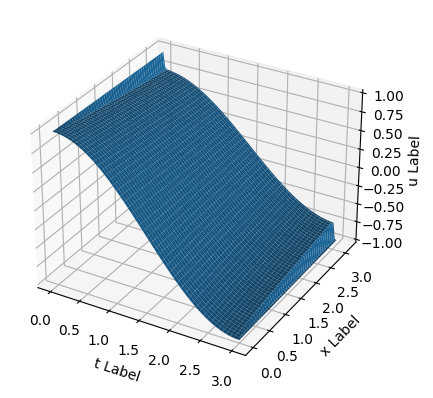

In [33]:
u = [[0 for j in range(len(T))] for i in range(len(X))]

for j in range(len(X)):
    u[j][0] = xi(X[j])
    
for k in range(len(T) - 1):
    u[0][k+1] = phi_0(T[k+1])
    
for k in range(len(T) - 1):
    u[-1][k+1] = phi_l(T[k+1])
    
for j in range(1, len(X) - 1):
    for k in range(len(T) - 1):
        u[j][k+1] = sigma*u[j+1][k] + (1 - 2*sigma)*u[j][k] + sigma*u[j-1][k]
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Q, W = np.meshgrid(X, T)
ax.plot_surface(W, Q, np.array(u))

ax.set_xlabel('t Label')
ax.set_ylabel('x Label')
ax.set_zlabel('u Label')

print('Средкв ошибка:', math.sqrt(sum([sum([(U(X[i], T[j]) - u[i][j])**2 for j in range(len(T))]) for i in range(len(X))])))


# Неявная схема

Средкв ошибка: 1.1664408878653911


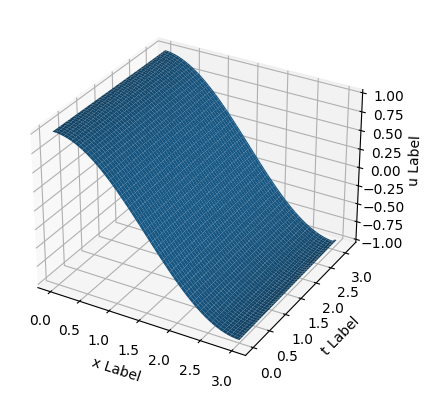

In [27]:
u = [[0 for j in range(len(T))] for i in range(len(X))]

for k in range(len(T) - 1):
    u[0][k+1] = phi_0(T[k+1])
    
for k in range(len(T) - 1):
    u[-1][k+1] = phi_l(T[k+1])
    
for j in range(len(X)):
    u[j][0] = xi(X[j])
    
for k in range(len(T) - 1):
    A = [sigma if i != 0 else 0 for i in range(N-2)]
    B = [-(1 + 2*sigma) for i in range(N-2)]
    C = [sigma if i != N-3 else 0 for i in range(N-2)]
    D = [-u[j][k] for j in range(2, N-2)]
    D.insert(0, -(u[1][k] + sigma*phi_0(T[k+1])))
    D.append(-(u[N-1][k] + sigma*phi_l(T[k+1])))
    
    P, Q = [-C[0] / B[0]], [D[0] / B[0]]
    n = len(A)
#     print(len(A), len(B), len(C), len(D))
    
    for i in range(1, n):
        P.append(-C[i] / (B[i] + A[i] * P[i - 1]))
        Q.append((D[i] - A[i] * Q[i - 1]) / (B[i] + A[i] * P[i - 1]))

    uk = [Q[n - 1]]
    
    for i in range(1, n):
        uk.append(P[n - 1 - i] * uk[i - 1] + Q[n - 1 - i])

    uk = list(reversed(uk))
#     print(uk)
    
    for j in range(1, N-1):
        u[j][k+1] = uk[j-1]
    
# np.array(u)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Q, W = np.meshgrid(X, T)
ax.plot_surface(W, Q, np.array(u))

ax.set_xlabel('x Label')
ax.set_ylabel('t Label')
ax.set_zlabel('u Label')

print('Средкв ошибка:', math.sqrt(sum([sum([(U(X[i], T[j]) - u[i][j])**2 for j in range(len(T))]) for i in range(len(X))])))


# Явно-неявня схема

In [28]:
teta = 1/2

Средкв ошибка: 1.166492985453466


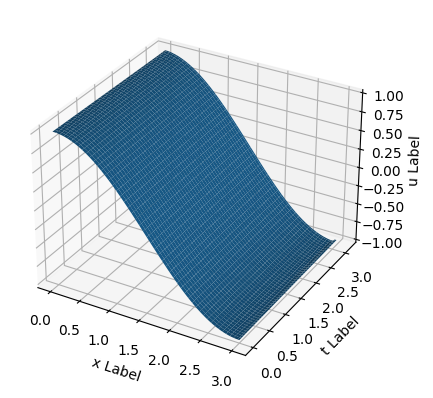

In [29]:
u = [[0 for j in range(len(T))] for i in range(len(X))]

for k in range(len(T) - 1):
    u[0][k+1] = phi_0(T[k+1])
    
for k in range(len(T) - 1):
    u[-1][k+1] = phi_l(T[k+1])
    
for j in range(len(X)):
    u[j][0] = xi(X[j])
    
for k in range(len(T) - 1):
    A = [teta*sigma if i != 0 else 0 for i in range(N-2)]
    B = [-(1 + 2*teta*sigma) for i in range(N-2)]
    C = [teta*sigma if i != N-3 else 0 for i in range(N-2)]
    D = [- (1-teta)*sigma*u[j+1][k] - (1 - 2*(1-teta)*sigma)*u[j][k] - (1-teta)*sigma*u[j-1][k] for j in range(2, N-2)]
    D.insert(0, -(teta*sigma*phi_0(T[k+1]) + (1-teta)*sigma*u[2][k] + (1 - 2*(1-teta)*sigma)*u[1][k] + (1-teta)*sigma*phi_0(T[k])))
    D.append(-(teta*sigma*phi_l(T[k+1]) + (1-teta)*sigma*phi_l(T[k]) + (1 - 2*(1-teta)*sigma)*u[N-1][k] + (1-teta)*sigma*u[N-2][k]))
    
    P, Q = [-C[0] / B[0]], [D[0] / B[0]]
    n = len(A)
#     print(len(A), len(B), len(C), len(D))
    
    for i in range(1, n):
        P.append(-C[i] / (B[i] + A[i] * P[i - 1]))
        Q.append((D[i] - A[i] * Q[i - 1]) / (B[i] + A[i] * P[i - 1]))

    uk = [Q[n - 1]]
    
    for i in range(1, n):
        uk.append(P[n - 1 - i] * uk[i - 1] + Q[n - 1 - i])

    uk = list(reversed(uk))
#     print(uk)
    
    for j in range(1, N-1):
        u[j][k+1] = uk[j-1]
    
# np.array(u)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Q, W = np.meshgrid(X, T)
ax.plot_surface(W, Q, np.array(u))

ax.set_xlabel('x Label')
ax.set_ylabel('t Label')
ax.set_zlabel('u Label')

print('Средкв ошибка:', math.sqrt(sum([sum([(U(X[i], T[j]) - u[i][j])**2 for j in range(len(T))]) for i in range(len(X))])))


# Граничные условия третьего рода

$$ \alpha\frac{\partial u(0,t)}{\partial x} + \beta u(0,t) = \varphi_0(t), x=0, t>0$$
$$ \gamma\frac{\partial u(0,t)}{\partial x} + \delta u(l,t) = \varphi_l(t), x=l, t>0$$

In [34]:
alpha = 0
beta = 1
gamma = 0
delta = 1

Средкв ошибка: 9.816601747358625


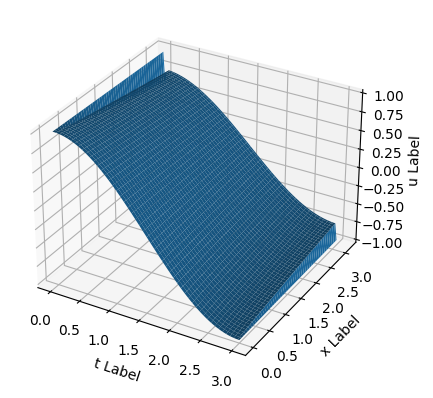

In [35]:
u = [[0 for j in range(len(T))] for i in range(len(X))]

for j in range(len(X)):
    u[j][0] = xi(X[j])

for j in range(1, len(X) - 1):
    for k in range(len(T) - 1):
        u[j][k+1] = sigma*u[j+1][k] + (1 - 2*sigma)*u[j][k] + sigma*u[j-1][k]

for k in range(len(T) - 1):
    u[0][k+1] = -(alpha/h) / (beta - alpha/h) * u[1][k+1] + phi_0(T[k+1]) / (beta - alpha/h)
    
for k in range(len(T) - 1):
    u[-1][k+1] = -(gamma/h) / (delta - gamma/h) * u[-2][k+1] + phi_l(T[k+1]) / (delta - gamma/h)
    
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Q, W = np.meshgrid(X, T)
ax.plot_surface(W, Q, np.array(u))

ax.set_xlabel('t Label')
ax.set_ylabel('x Label')
ax.set_zlabel('u Label')

print('Средкв ошибка:', math.sqrt(sum([sum([(U(X[i], T[j]) - u[i][j])**2 for j in range(len(T))]) for i in range(len(X))])))


Средкв ошибка: 1.1785393230924237


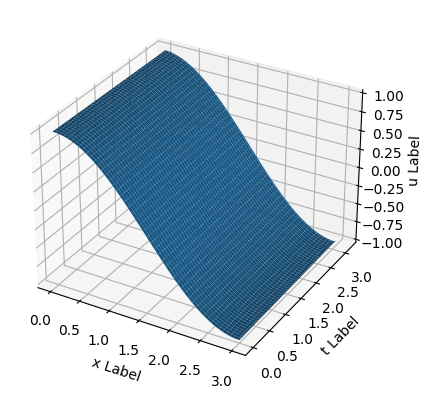

In [46]:
u = [[0 for j in range(len(T))] for i in range(len(X))]
    
for j in range(len(X)):
    u[j][0] = xi(X[j])
    
for k in range(len(T) - 1):
    A = [0]
    B = [beta - alpha/h]
    C = [alpha/h]
    D = [phi_0(T[k+1])/(beta - alpha/h)]
    for j in range(1, N-1):
        A.append(sigma)
        B.append(-(1 + 2*sigma))
        C.append(sigma)
        D.append(-u[j][k])
        
    A.append(-gamma/h)
    B.append(delta + gamma/h)
    C.append(0)
    D.append(phi_l(T[k+1])/(delta + gamma/h))
    
    P, Q = [-C[0] / B[0]], [D[0] / B[0]]
    n = len(A)
#     print(len(A), len(B), len(C), len(D))
    
    for i in range(1, n):
        P.append(-C[i] / (B[i] + A[i] * P[i - 1]))
        Q.append((D[i] - A[i] * Q[i - 1]) / (B[i] + A[i] * P[i - 1]))

    uk = [Q[n - 1]]
    
    for i in range(1, n):
        uk.append(P[n - 1 - i] * uk[i - 1] + Q[n - 1 - i])

    uk = list(reversed(uk))
#     print(uk)
    
    for j in range(N):
        u[j][k+1] = uk[j]
    
# np.array(u)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Q, W = np.meshgrid(X, T)
ax.plot_surface(W, Q, np.array(u))

ax.set_xlabel('x Label')
ax.set_ylabel('t Label')
ax.set_zlabel('u Label')

print('Средкв ошибка:', math.sqrt(sum([sum([(U(X[i], T[j]) - u[i][j])**2 for j in range(len(T))]) for i in range(len(X))])))


In [ ]:
u = [[0 for j in range(len(T))] for i in range(len(X))]

for j in range(len(X)):
    u[j][0] = xi(X[j])
    
for k in range(len(T) - 1):
    A = [teta*sigma if i != 0 else 0 for i in range(N-2)]
    B = [-(1 + 2*teta*sigma) for i in range(N-2)]
    C = [teta*sigma if i != N-3 else 0 for i in range(N-2)]
    D = [- (1-teta)*sigma*u[j+1][k] - (1 - 2*(1-teta)*sigma)*u[j][k] - (1-teta)*sigma*u[j-1][k] for j in range(2, N-2)]
    D.insert(0, -(teta*sigma*phi_0(T[k+1]) + (1-teta)*sigma*u[2][k] + (1 - 2*(1-teta)*sigma)*u[1][k] + (1-teta)*sigma*phi_0(T[k])))
    D.append(-(teta*sigma*phi_l(T[k+1]) + (1-teta)*sigma*phi_l(T[k]) + (1 - 2*(1-teta)*sigma)*u[N-1][k] + (1-teta)*sigma*u[N-2][k]))
    
    P, Q = [-C[0] / B[0]], [D[0] / B[0]]
    n = len(A)
#     print(len(A), len(B), len(C), len(D))
    
    for i in range(1, n):
        P.append(-C[i] / (B[i] + A[i] * P[i - 1]))
        Q.append((D[i] - A[i] * Q[i - 1]) / (B[i] + A[i] * P[i - 1]))

    uk = [Q[n - 1]]
    
    for i in range(1, n):
        uk.append(P[n - 1 - i] * uk[i - 1] + Q[n - 1 - i])

    uk = list(reversed(uk))
#     print(uk)
    
    for j in range(1, N-1):
        u[j][k+1] = uk[j-1]
        
for k in range(len(T) - 1):
    A = [0]
    B = [beta - alpha/h]
    C = [alpha/h]
    D = [phi_0(T[k+1])/(beta - alpha/h)]
    for j in range(1, N-1):
        A.append(teta*sigma)
        B.append(-(1 + 2*teta*sigma))
        C.append(teta*sigma)
        D.append(-u[j][k])
        
    A.append(-gamma/h)
    B.append(delta + gamma/h)
    C.append(0)
    D.append(phi_l(T[k+1])/(delta + gamma/h))
    
    P, Q = [-C[0] / B[0]], [D[0] / B[0]]
    n = len(A)
#     print(len(A), len(B), len(C), len(D))
    
    for i in range(1, n):
        P.append(-C[i] / (B[i] + A[i] * P[i - 1]))
        Q.append((D[i] - A[i] * Q[i - 1]) / (B[i] + A[i] * P[i - 1]))

    uk = [Q[n - 1]]
    
    for i in range(1, n):
        uk.append(P[n - 1 - i] * uk[i - 1] + Q[n - 1 - i])

    uk = list(reversed(uk))
#     print(uk)
    
    for j in range(N):
        u[j][k+1] = uk[j]
    
# np.array(u)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Q, W = np.meshgrid(X, T)
ax.plot_surface(W, Q, np.array(u))

ax.set_xlabel('x Label')
ax.set_ylabel('t Label')
ax.set_zlabel('u Label')

print('Средкв ошибка:', math.sqrt(sum([sum([(U(X[i], T[j]) - u[i][j])**2 for j in range(len(T))]) for i in range(len(X))])))


In [77]:
import numpy as np
import math


class ParabolicTypeEquations:
    def __init__(self, func, phi_0, phi_l, xi, x, t, a, N=100):
        self.func = func
        self.phi_0 = phi_0
        self.phi_l = phi_l
        self.xi = xi
        self.x = x
        self.t = t
        self.N = N
        self.h = (x[-1] - x[1]) / N
        self.tau = (t[-1] - t[1]) / N
        self.sigma = a * a * self.tau / self.h / self.h

    # Точное решение
    def exact_solution(self):
        return np.array([[self.func(x, t) for t in self.t] for x in self.x])

    # Явная конечно-разностная схема
    def explicit_finite_difference_scheme(self):
        u = [[0 for j in range(len(self.t))] for i in range(len(self.x))]

        for j in range(len(self.x)):
            u[j][0] = self.xi(self.x[j])

        for k in range(len(self.t) - 1):
            u[0][k + 1] = self.phi_0(self.t[k + 1])

        for k in range(len(self.t) - 1):
            u[-1][k + 1] = self.phi_l(self.t[k + 1])

        for j in range(1, len(self.x) - 1):
            for k in range(len(self.t) - 1):
                u[j][k + 1] = self.sigma * u[j + 1][k] + (1 - 2 * self.sigma) * u[j][k] + self.sigma * u[j - 1][k]

        return u

    # Неявная схема
    def implicit_finite_difference_scheme(self):
        u = [[0 for j in range(len(self.t))] for i in range(len(self.x))]

        for k in range(len(self.t) - 1):
            u[0][k + 1] = self.phi_0(self.t[k + 1])

        for k in range(len(self.t) - 1):
            u[-1][k + 1] = self.phi_l(self.t[k + 1])

        for j in range(len(self.x)):
            u[j][0] = self.xi(self.x[j])

        for k in range(len(self.t) - 1):
            A = [self.sigma if i != 0 else 0 for i in range(self.N - 2)]
            B = [-(1 + 2 * self.sigma) for i in range(self.N - 2)]
            C = [self.sigma if i != self.N - 3 else 0 for i in range(self.N - 2)]
            D = [-u[j][k] for j in range(2, self.N - 2)]
            D.insert(0, -(u[1][k] + self.sigma * self.phi_0(self.t[k + 1])))
            D.append(-(u[self.N - 1][k] + self.sigma * self.phi_l(self.t[k + 1])))

            uk = self.progonka(A, B, C, D)
            for j in range(1, self.N - 1):
                u[j][k + 1] = uk[j - 1]

        return u

    # Явно-неявня схема
    def explicit_implicit_finite_difference_scheme(self, teta):
        u = [[0 for j in range(len(self.t))] for i in range(len(self.x))]

        for k in range(len(self.t) - 1):
            u[0][k + 1] = self.phi_0(self.t[k + 1])

        for k in range(len(self.t) - 1):
            u[-1][k + 1] = self.phi_l(self.t[k + 1])

        for j in range(len(self.x)):
            u[j][0] = self.xi(self.x[j])

        for k in range(len(self.t) - 1):
            A = [teta * self.sigma if i != 0 else 0 for i in range(self.N - 2)]
            B = [-(1 + 2 * teta * self.sigma) for i in range(self.N - 2)]
            C = [teta * self.sigma if i != self.N - 3 else 0 for i in range(self.N - 2)]
            D = [- (1 - teta) * self.sigma * u[j + 1][k] - (1 - 2 * (1 - teta) * self.sigma) * u[j][k] - (
                        1 - teta) * self.sigma * u[j - 1][k] for j in range(2, self.N - 2)]
            D.insert(0, -(teta * self.sigma * self.phi_0(self.t[k + 1]) + (1 - teta) * self.sigma * u[2][k] + (
                        1 - 2 * (1 - teta) * self.sigma) * u[1][k] + (1 - teta) * self.sigma * self.phi_0(self.t[k])))
            D.append(-(teta * self.sigma * self.phi_l(self.t[k + 1]) + (1 - teta) * self.sigma * self.phi_l(T[k]) + (
                        1 - 2 * (1 - teta) * self.sigma) * u[self.N - 1][k] + (1 - teta) * self.sigma * u[self.N - 2][
                           k]))

            uk = self.progonka(A, B, C, D)

            for j in range(1, self.N - 1):
                u[j][k + 1] = uk[j - 1]

        return u

    def progonka(self, a, b, c, d):
        n = len(a)
        for i in range(n):
            if math.fabs(b[i]) < math.fabs(a[i]) + math.fabs(c[i]):
                raise Exception

        #   Формирование массивов P, Q (Расчет значений) ((Прямой ход))

        P, Q = [-c[0] / b[0]], [d[0] / b[0]]

        for i in range(1, n):
            P.append(-c[i] / (b[i] + a[i] * P[i - 1]))
            Q.append((d[i] - a[i] * Q[i - 1]) / (b[i] + a[i] * P[i - 1]))

        #   Вычисление решения системы (Обратный ход)
        x = [Q[n - 1]]
        for i in range(1, n):
            x.append(P[n - 1 - i] * x[i - 1] + Q[n - 1 - i])

        return list(reversed(x))


In [78]:
equations = ParabolicTypeEquations(U, phi_0, phi_l, xi, X, T, a)

Явная схема: средкв ошибка: 9.519254412148051
Неявная схема: средкв ошибка: 1.1662740885781682
Явно-неявная схема: средкв ошибка: 1.1663265635626778


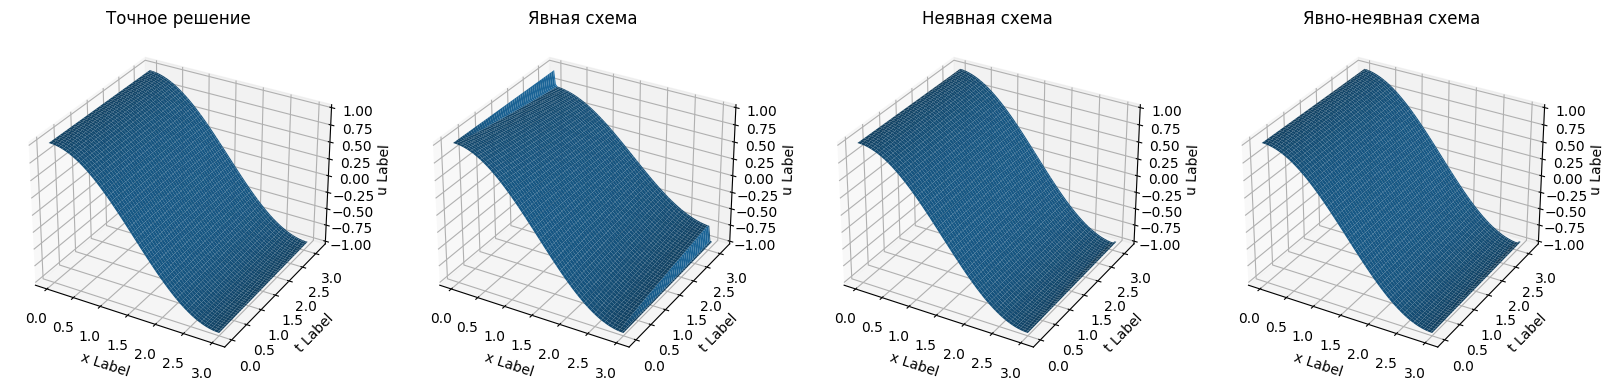

In [86]:
fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(1, 4, 1, projection='3d')
ax.set_title('Точное решение')

u = equations.exact_solution()

Q, W = np.meshgrid(X, T)
ax.plot_surface(W, Q, np.array(u))

ax.set_xlabel('x Label')
ax.set_ylabel('t Label')
ax.set_zlabel('u Label')


ax = fig.add_subplot(1, 4, 2, projection='3d')
ax.set_title('Явная схема')

u = equations.explicit_finite_difference_scheme()

Q, W = np.meshgrid(X, T)
ax.plot_surface(W, Q, np.array(u))

ax.set_xlabel('x Label')
ax.set_ylabel('t Label')
ax.set_zlabel('u Label')
print('Явная схема: средкв ошибка:', math.sqrt(sum([sum([(U(X[i], T[j]) - u[i][j])**2 for j in range(len(T))]) for i in range(len(X))])))


ax = fig.add_subplot(1, 4, 3, projection='3d')
ax.set_title('Неявная схема')


u = equations.implicit_finite_difference_scheme()

Q, W = np.meshgrid(X, T)
ax.plot_surface(W, Q, np.array(u))

ax.set_xlabel('x Label')
ax.set_ylabel('t Label')
ax.set_zlabel('u Label')
print('Неявная схема: средкв ошибка:', math.sqrt(sum([sum([(U(X[i], T[j]) - u[i][j])**2 for j in range(len(T))]) for i in range(len(X))])))


ax = fig.add_subplot(1, 4, 4, projection='3d')
ax.set_title('Явно-неявная схема')


u = equations.explicit_implicit_finite_difference_scheme(1/2)

Q, W = np.meshgrid(X, T)
ax.plot_surface(W, Q, np.array(u))

ax.set_xlabel('x Label')
ax.set_ylabel('t Label')
ax.set_zlabel('u Label')
print('Явно-неявная схема: средкв ошибка:', math.sqrt(sum([sum([(U(X[i], T[j]) - u[i][j])**2 for j in range(len(T))]) for i in range(len(X))])))
